#**The Standard Deviants(Group1)**

# **Introduction**


##The goal of the exploratory data analysis is to determine: *“To what extent does the adoption of climate-smart agricultural (CSA) practices improve maize productivity and household food-nutrition security among smallholder farmers in North-West South Africa?”*

##Install Relevant Packages

Install relevant packages

In [ ]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install plotnine
!pip install great_tables
!pip install skimpy
!pip install openpyxl
!pip install RandomForestClassifier
!pip install train_test_split
!pip install tabulate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 25.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.1/51.1 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 607.2/607.2 kB 40.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.2/117.2 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 102.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 76.4 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
  Attempting uninstall: ipykernel
    Found existing installation: ipykernel 6.17.1
    Uninstalling ipykernel-6.17.1:
      Successfully uninstalled ipykernel-6.17.1
ERROR: pip's dependency resolver does not current

##Import Relevant Packages

Import the preferred and relevant packages

In [ ]:
import pandas as pd #data manipulation
from great_tables import md, html
import great_tables as gt #Table creation
import numpy as np #matrix operations
import seaborn as sns #statistical data visualisation
import re #Regular Expressions
import skimpy#Detailed summary statistics and visualizations for a DataFrame
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans #Clustering
from sklearn.metrics import silhouette_score #Clustering
from scipy.stats import spearmanr #Spearman rank correlation
from scipy.stats import spearmanr #Spearman rank correlation
from tabulate import tabulate #Display Tabular data
import plotnine as p9 #data visualisation
from plotnine import *
import matplotlib.pyplot as plt
%matplotlib inline
from plotnine import (

ggplot,
aes,
after_stat,
stage,
geom_bar,
geom_line,
geom_point,
geom_boxplot,
geom_area,
geom_histogram,
geom_errorbar,
geom_text,
geom_label,
coord_flip,
theme,
labs,
element_text
 )
import plotnine as p9
p9.theme_set(p9.theme_minimal())

# **Data Import**

Data is imported from an external file to prepare for preprocessing,cleaning and feature engineering

In [ ]:
#Import data
df= pd.read_excel("data_in_bried_on_CSA_HDDS_and_HFIAS.xlsx")

# **Preprocessing**

Data is cleaned by running a skimpy report to check for missing values,imputing if they exist, dropping any duplicate rows, imputing out of range values for a cleaned data set with no duplicate rows and saved for future analysis

In [ ]:


# Comprehensive summary of dataframe statistics
skimpy.skim(df)

# Handling binary columns (1/2 → 1/0 indicators)
bin_columns = [col for col in df.columns if col.startswith(('B', 'b', 'CSA', 'HHFS', 'FICS'))]

for col in bin_columns:
    if col in df.columns:
        # Ensuring binary values: keep 1 as 1, convert 2 to 0 (or anything >1 becomes 0)
        df[col] = df[col].apply(lambda x: 1 if x <= 1 else 0)

# Convert specified numeric columns to categorical
categorical_columns = [
    'm status', 'sex', 'edu status', 'race', 'religion', 'member',
    'S occup', 'Land tenure', 'coop', 'credit', 'off-farm', 'extension',
    'A CC training', 'S finance', 'Social Safety', 'Irrigation_technology',
    'Marketing', 'Mobile_phone', 'Television_set', 'Radio',
    'Agricultural_Incentives', 'Indigenous_Livestocks',
    'Benefit_from_social_or_child_supportGrant'
]

for col in categorical_columns:
    if col in df.columns:
        df[col] = df[col].astype('category')

# Step 3: Remove duplicate rows
initial_rows = len(df)
df_cleaned = df.drop_duplicates()
final_rows = len(df_cleaned)
duplicates_removed = initial_rows - final_rows

# Output info
print(f"Initial rows: {initial_rows}")
print(f"Final rows after removing duplicates: {final_rows}")
print(f"Duplicates removed: {duplicates_removed}")


╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 316    │ │ int64       │ 143   │                                                          │
│ │ Number of columns │ 143    │ └─────────────┴───────┘                                                          │
│ └───────────────────┴────────┘                                                                                  │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┓  │
│ ┃ column                 ┃ NA  ┃ NA %  ┃ mean    ┃ sd      ┃ p0     ┃ p25   ┃ p50   ┃ p75   ┃ p100  ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━┩  │
│ │ sno                    │   0 │     0 │   158.5 │   91.37 │      1 │ 79.75 │ 158.5 │ 237.2 │   316 │ ██████ │  │
│ │ age                    │   0 │     0 │    45.1 │   11.65 │     19 │    39 │    46 │    50 │    74 │ ▂▁█▇▁▂ │  │
│ │ m status               │   0 │     0 │   1.424 │  0.5778 │      1 │     1 │     1 │     2 │     3 │ █  ▄ ▁ │  │
│ │ sex                    │   0 │     0 │   1.373 │  0.5576 │      1 │     1 │     1 │     2 │     4 │  █ ▄   │  │
│ │ edu status             │   0 │     0 │   2.886 │   1.179 │      1 │     2 │     3 │     4 │     4 │ ▄ ▂ ▅█ │  │
│ │ race                   │   0 │     0 │   1.259 │  0.6292 │      1 │     1 │     1 │     1 │     3 │ █  ▁ ▁ │  │
│ │ religion               │   0 │     0 │   1.136 │   0.403 │      1 │     1 │     1 │     1 │     3 │  █  ▁  │  │
│ │ hh size                │   0 │     0 │   4.737 │    2.25 │      1 │  3.75 │     4 │     6 │    12 │ ▅██▂▁▁ │  │
│ │ member                 │   0 │     0 │   2.025 │   1.011 │      0 │     1 │     2 │     2 │     8 │  ▅█▃▁  │  │
│ │ S occup                │   0 │     0 │   2.456 │   1.161 │      1 │  1.75 │     2 │     3 │     5 │ ▇█ ▇▄▁ │  │
│ │ Yr farming             │   0 │     0 │   10.35 │   6.099 │      1 │     7 │    10 │    10 │    40 │  ▄█▁▁  │  │
│ │ Land tenure            │   0 │     0 │   2.066 │   1.205 │      1 │     1 │     2 │     3 │     4 │ █ ▃ ▂▃ │  │
│ │ Farm size              │   0 │     0 │   21.25 │      14 │      8 │    10 │    15 │    30 │    70 │  █▃▁▂  │  │
│ │ coop                   │   0 │     0 │   1.722 │   0.449 │      1 │     1 │     2 │     2 │     2 │ ▃    █ │  │
│ │ credit                 │   0 │     0 │    1.69 │  0.4633 │      1 │     1 │     2 │     2 │     2 │ ▄    █ │  │
│ │ off-farm               │   0 │     0 │   1.642 │  0.4801 │      1 │     1 │     2 │     2 │     2 │ ▄    █ │  │
│ │ extension              │   0 │     0 │    1.68 │  0.4671 │      1 │     1 │     2 │     2 │     2 │ ▄    █ │  │
│ │ A CC training          │   0 │     0 │    1.68 │  0.4671 │      1 │     1 │     2 │     2 │     2 │ ▄    █ │  │
│ │ S finance              │   0 │     0 │   1.858 │   1.105 │      0 │     1 │     1 │     3 │     4 │  █ ▃▂▂ │  │
│ │ Social Safety          │   0 │     0 │   1.604 │  0.6413 │      1 │     1 │     2 │     2 │     4 │  ▇ █   │  │
│ │ Irrigation_technology  │   0 │     0 │  0.5506 │  0.4982 │      0 │     0 │     1 │     1 │     1 │ ▇    █ │  │
│ │ Cost_of_farming_land   │   0 │     0 │   281.5 │   457.3 │      0 │ 134.8 │ 264.5 │ 375.2 │  8000 │   █    │  │
│ │ Land_clearing          │   0 │     0 │   856.2 │    

Initial rows: 316
Final rows after removing duplicates: 316
Duplicates removed: 0


In [ ]:
#Data summary
skimpy.skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                         Categories                              │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓            │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃ ┃ Categorical Variables                     ┃            │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩            │
│ │ Number of rows    │ 316    │ │ int64       │ 120   │ │ m status                                  │            │
│ │ Number of columns │ 143    │ │ category    │ 23    │ │ sex                                       │            │
│ └───────────────────┴────────┘ └─────────────┴───────┘ │ edu status                                │            │
│                                                        │ race                                      │            │
│                                                        │ religion                                  │            │
│                                                        │ member                                    │            │
│                                                        │ S occup                                   │            │
│                                                        │ Land tenure                               │            │
│                                                        │ coop                                      │            │
│                                                        │ credit                                    │            │
│                                                        │ off-farm                                  │            │
│                                                        │ extension                                 │            │
│                                                        │ A CC training                             │            │
│                                                        │ S finance                                 │            │
│                                                        │ Social Safety                             │            │
│                                                        │ Irrigation_technology                     │            │
│                                                        │ Marketing                                 │            │
│                                                        │ Mobile_phone                              │            │
│                                                        │ Television_set                            │            │
│                                                        │ Radio                                     │            │
│                                                        │ Agricultural_Incentives                   │            │
│                                                        │ Indigenous_Livestocks                     │            │
│                                                        │ Benefit_from_social_or_child_supportGrant │            │
│                                                        └───────────────────────────────────────────┘            │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┓  │
│ ┃ column                 ┃ NA  ┃ NA %  ┃ mean    ┃ sd      ┃ p0     ┃ p25   ┃ p50   ┃ p75   ┃ p100  ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━┩  │
│ │ sno                    │   0 │     0 │   158.5 │   91.37 │      1 │ 79.75 │ 158.5 │ 237.2 │   316 │ ██████ │  │
│ │ age                    │   0 │     0 │    45.1 │   1

### **Data Quality**
* Binary variables like CSA1-18, HHFS1-HHFS12 and FICS1-FICS13 were  converted by changing alls 2s to 0, in order to treat them as binary indicators (1 = Yes, 0 = No).
* Demographic and other related columns were explicitly converted to categorical data types.

**Dataset Overview**
* Rows:316
* Columns:143
* Numeric Columns: 120(int 64)
* Categorial Columns: 23

## **Feature Engineering**


This prepares a dataset for analysis by creating new features, aggregating scores, and standardising column names.


Maize productivity refers to "The amount of maize grain produced per unit of land, typically expressed as tons per hectare (t/ha")
Thus:
* Maize Productivity Calculation:Computes Maize Productivity as the ratio of Farm_Output (yield) to Farm Size (area), representing yield per hectare (tons/ha).

* CSA Score Aggregation:
Sums 18 columns (CSA1 to CSA18) representing individual Climate-Smart Agriculture (CSA) practices into a single CSA_Score.Since adoption of an individual CSA practice is converted to 1 it will add all the 1 values across the practices to create a score for each farmer
This creates a score reflecting the extent of CSA adoption (higher score = more CSA practices adopted).
* Household Food Security Score:
Sums 12 columns (HHFS1 to HHFS12) into HH_FoodSecurity_Score.(higher score = better food security).
* Food Insecurity Coping Strategy Score:
Sums 13 columns (FICS1 to FICS13) into FoodInsecurity_CopingStrategy_Score.
Combines indicators of coping strategies for food insecurity(higher score may indicate more coping strategies used).

* Column Renaming:
Renames columns for clarity and consistency
Standardizes naming and provides descriptive labels for CSA practices. To ensure the dataset is more interpretable for analysis.






In [ ]:
# Create Maize Productivity = Farm_output / Farm Size
# Assuming 'Farm_output' and 'Farm Size' are named exactly that in the data
if 'Farm_Output' in df.columns and 'Farm size' in df.columns:
    df['Maize Productivity'] = df['Farm_Output'] / df['Farm size']
else:
    print("Warning: 'Farm_output' or 'Farm Size' not found. Check column names.")


# Sum CSA1 to CSA18
csa_cols = [f'CSA{i}' for i in range(1, 19)]
df['CSA_Score'] = df[csa_cols].sum(axis=1)

# Sum HHFS1 to HHFS12
hhfs_cols = [f'HHFS{i}' for i in range(1, 13)]
df['HH_FoodSecurity_Score'] = df[hhfs_cols].sum(axis=1)

# Sum FICS1 to FICS13
fics_cols = [f'FICS{i}' for i in range(1, 14)]
df['FoodInsecurity_CopingStrategy_Score'] = df[fics_cols].sum(axis=1)

# Rename columns
df.rename(columns={
    'E1': 'Maize Harvested (tons)',
    'E5': 'Maize (Net Income)',
    'age':'Age',
    'Farm size':'Farm Size',
    'Farm_Output':'Farm Yield',
    'sex':'Sex',
    'edu status':'Education Status',
    'race':'Race',
    'hh size':'Household Size',
    'Yr farming':'Years Farming',
    'credit':'Credit Access',
    'A cc training': 'Climate Control Training',
    'Irrigation-technology': 'Irrigation Technology',
    'Benefit_from_social_or_child_supportGrant': 'Recepient of Grant',
    'IncomeSource_AsidefromSocialGrant':'Additional Income',
    'CSA1': 'Mulching',
    'CSA2': 'Drought Tolerant Crop',
    'CSA3': 'Inter-Cropping',
    'CSA4': 'Cover Cropping',
    'CSA5': 'Crop Rotation',
    'CSA6': 'Strip Cropping',
    'CSA7': 'Crop Intensification',
    'CSA8': 'Composting',
    'CSA9': 'Planting Legumes',
    'CSA10': 'Green Manuring',
    'CSA11': 'Water Harvesting',
    'CSA12': 'Sprinkler Irrigation',
    'CSA13': 'Zero-Tillage',
    'CSA14': 'Riding Contours',
    'CSA15': 'Earth Bunding',
    'CSA16': 'Stone Bunding',
    'CSA17': 'Agroforestry',
    'CSA18': 'Conservation Agri',



}, inplace=True)




* Data Cleaning and Feature Selection: The code removes columns that may not be relevant for the intended analysis.
* Simplifying the Dataset: Exploratory Data Analysis and for a dashboard.

In [ ]:
#Create lists of column names to drop
cols_to_drop = []
# Add D1-D11
cols_to_drop += [f'D{i}' for i in range(1, 12)]

# Add HHFS1-HHFS12
cols_to_drop += [f'HHFS{i}' for i in range(1, 13)]

# Add FICS1-FICS13
cols_to_drop += [f'FICS{i}' for i in range(1, 14)]

# Add B1-B7
cols_to_drop += [f'B{i}' for i in range(1, 8)]

# Add b1-b25
cols_to_drop += [f'b{i}' for i in range(1, 26)]

# Drop only if they exist in the DataFrame to avoid KeyError
cols_to_drop_existing = [col for col in cols_to_drop if col in df.columns]
df.drop(columns=cols_to_drop_existing, inplace=True)


drop_cols = [
    'sno', 'm status', 'religion', 'member', 'S occup', 'Land tenure', 'coop',
    'off-farm', 'extension', 'E2', 'E3', 'E8', 'E4', 'E7', 'E6', 'S finance',
    'Social Safety', 'Cost_of_farming_land', 'Land_clearing',
    'Stumping_and_other_preparatory_activites', 'Weeding',
    'Application_of_chemicals_herbicide', 'Application_of_chemicals_insecticides',
    'Fertilizers', 'Seed', 'Transportation_cost', 'Cost_of_irrigation',
    'Labour', 'Miscellaneous', 'Remittance_and_others', 'Non_farming_Activites',
    'AverageFarm_income', 'Farm_distance', 'Asset_value', 'Marketing',
    'Mobile_phone', 'Television_set', 'Radio', 'Agricultural_Incentives',
    'Indigenous_Livestocks'
]

# Drop only columns that exist in the DataFrame
existing_cols = [col for col in drop_cols if col in df.columns]
df = df.drop(columns=existing_cols)

In [ ]:
# Optional: Save to new Excel file
df.to_excel('Minimized_CSA_Final.xlsx', index=False)

# **Exploration**

Exploratory Data Analysis

###**Bar Plot**

Showing Average Maize yield harvested according to the adoption or non adoption of different CSA Practices


Bar Plot compares the average maize yield (in tons) for different climate-smart agricultural (CSA) practices. Categorized by whether they were adopted (red bars) or not adopted (baby blue bars) through a survey of 316 smallholder maize farmers from 20 random villages in North West Province South Africa.

**Data Source Of CSA practice names**:
*Atta-Aidoo J, Antwi-Agyei P, Dougill AJ (2022) Sample questionnaire for data collection.*
https://doi.org/10.1371/journal.pclm.0000082.s001

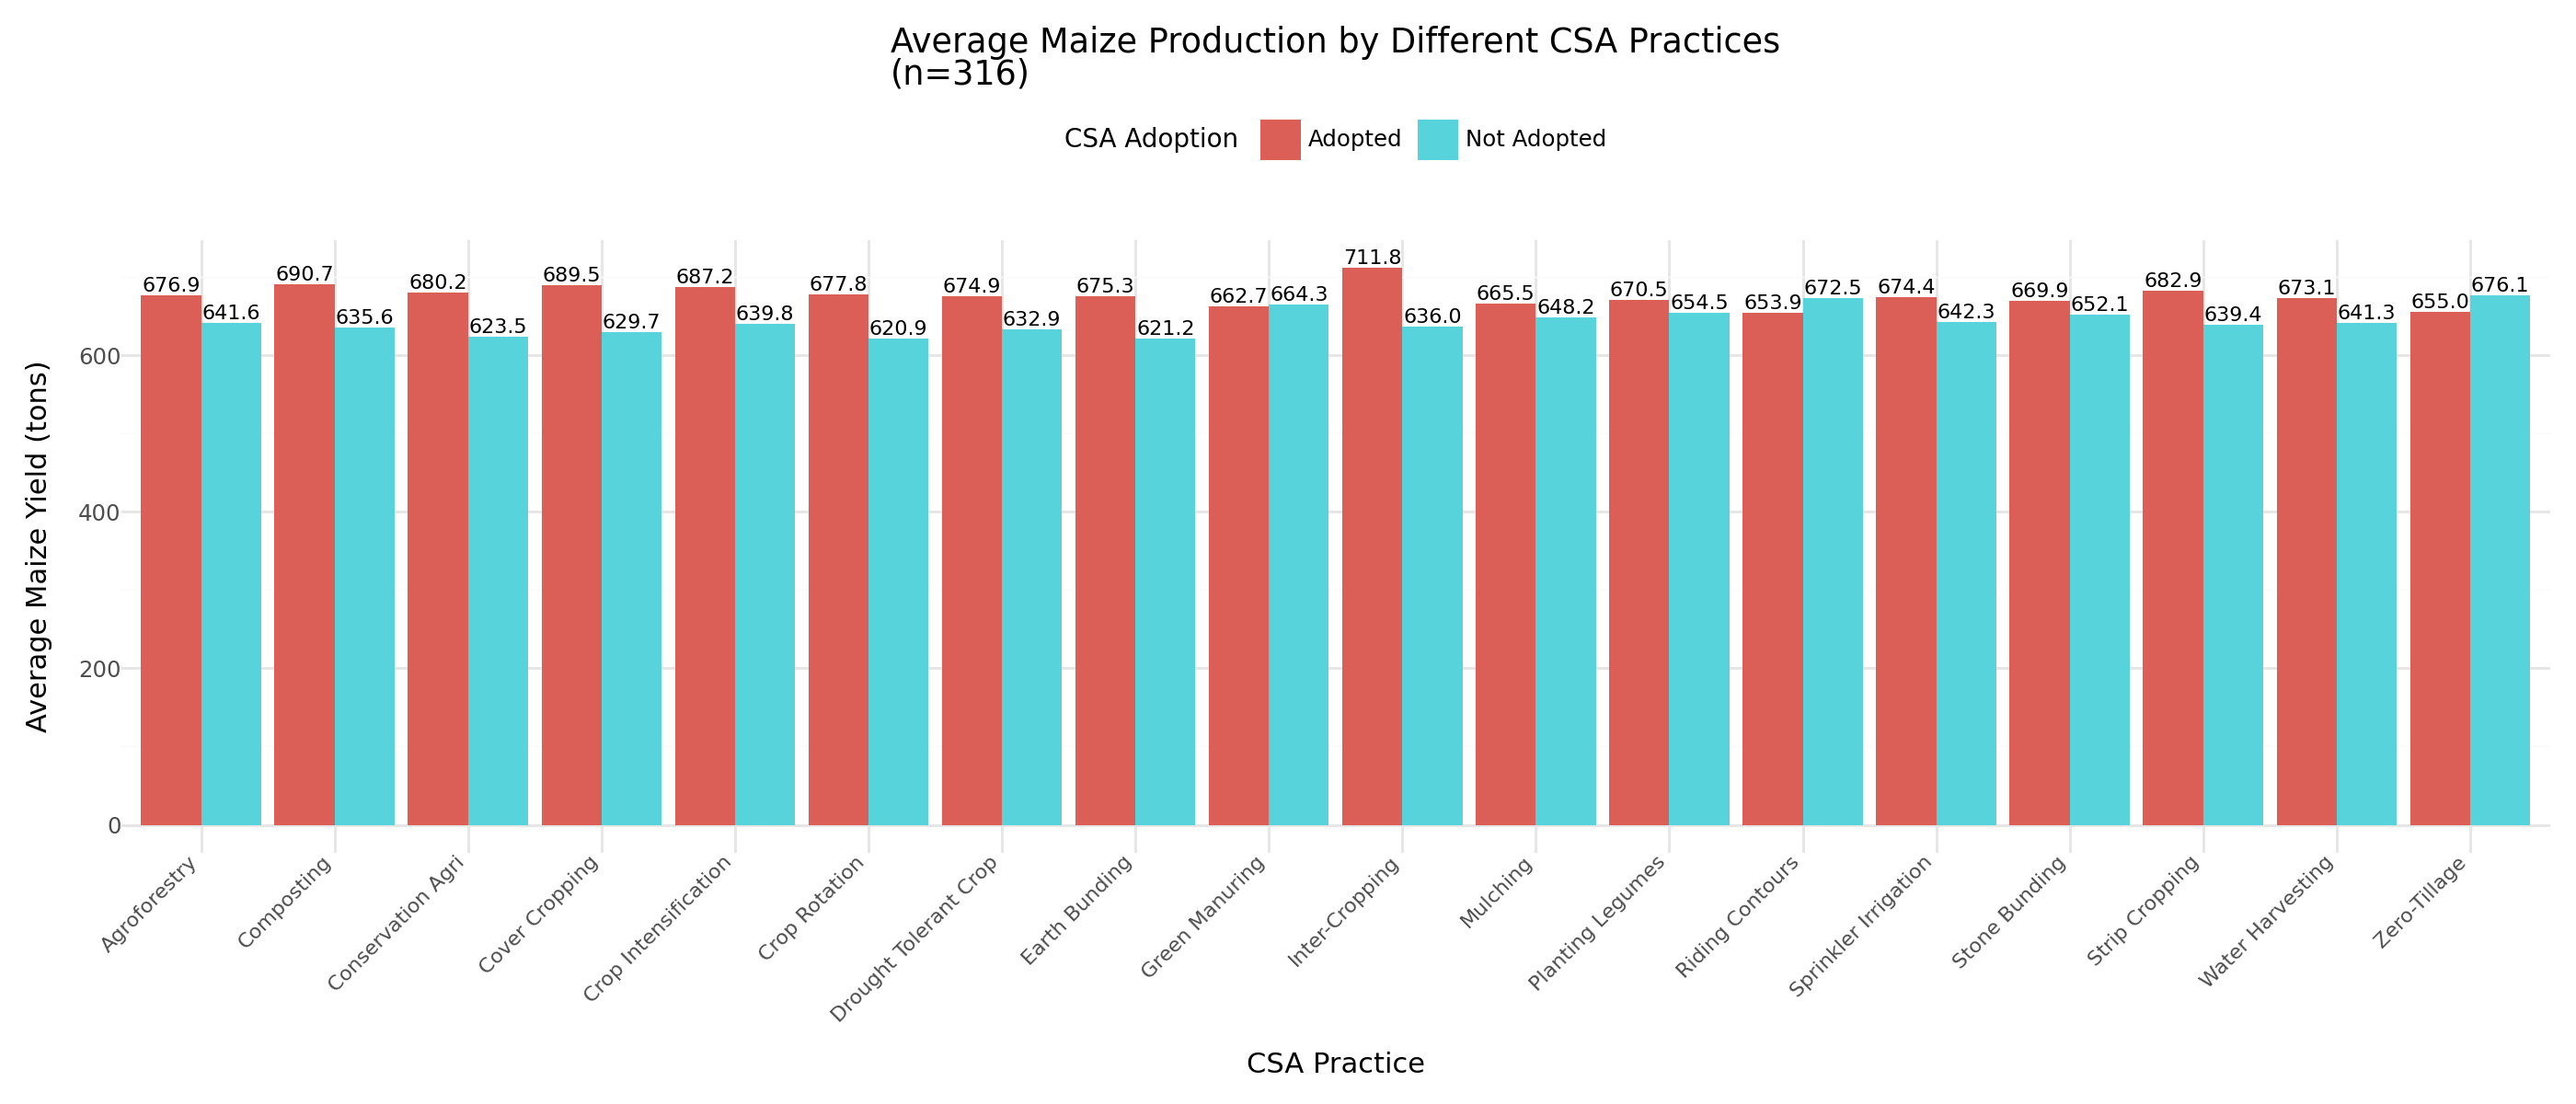

In [ ]:
# Defined list of column names representing various(CSA) practices
csaPrac_cols = ['Mulching',
    'Drought Tolerant Crop',
    'Inter-Cropping',
   'Cover Cropping',
   'Crop Rotation',
   'Strip Cropping',
   'Crop Intensification',
   'Composting',
   'Planting Legumes',
    'Green Manuring',
    'Water Harvesting',
    'Sprinkler Irrigation',
    'Zero-Tillage',
    'Riding Contours',
    'Earth Bunding',
    'Stone Bunding',
    'Agroforestry',
    'Conservation Agri']

# Subset the dataset
df_subset = df[csaPrac_cols + ['Farm Yield']].copy()

# Melt to long format
df_melted = pd.melt(
    df_subset,
    id_vars='Farm Yield',
    value_vars=csaPrac_cols,
    var_name='CSA_Practice',
    value_name='Adoption'
)

# Drop missing values if any
df_melted = df_melted.dropna(subset=['Adoption'])

# Ensure Adoption is integer
df_melted['Adoption'] = df_melted['Adoption'].astype(int)

# Group and calculate mean maize yield per CSA + adoption status
df_bar = df_melted.groupby(['CSA_Practice', 'Adoption'])['Farm Yield'].mean().reset_index()
# Convert Adoption to a categorical variable (so it's grouped correctly)
df_bar['Adoption'] = df_bar['Adoption'].map({0: 'Not Adopted', 1: 'Adopted'})

# Create the side-by-side bar plot
bar_plot = (
    ggplot(df_bar, aes(x='CSA_Practice', y='Farm Yield', fill='Adoption')) +
    geom_bar(stat='identity', position='dodge') +
    # Add data labels using geom_text
    geom_text(
        aes(label='Farm Yield'),
        position=position_dodge(width=0.9),  # Match the dodge width of the bars
        va='bottom',  # Vertical alignment: place labels just above the bars
        size=8,  # Font size for the labels
        format_string='{:.1f}'  #medians=True  # Round the values to 1 decimal place
    ) +
    labs(
        title='Average Maize Production by Different CSA Practices\n(n=316)',
        x='CSA Practice',
        y='Average Maize Yield (tons)',
        fill='CSA Adoption'
    ) +
    theme(
        axis_text_x=element_text(rotation=45, ha='right', size=8),
        figure_size=(14, 6),
        legend_title=element_text(size=10),
        legend_position='top'
    )
)


# Display the plot
(bar_plot)

**General Trend**:

Across most CSA practices, the adoption of these practices (red bars) tends to result in higher average maize yields compared to non-adoption (baby blue bars). This suggests that CSA practices generally improve maize productivity but only marginally.


1. Top-Performing Practices: Practices like Inter-Cropping, Crop Intensification, Agroforestry, and Cover Cropping show the largest differences in yields between users and non-users.

2. Narrow Gaps in Some Practices:
 A few practices like "Zero Tillage" and "Sprinkler Irrigation" show smaller yield gaps, suggesting limited added benefit or already optimized baseline practices.

3. In a few cases, such as "Green Manuring"(662.7 tons adopted vs. 664.3 tons not adopted),"Riding Contours"( 653.3 tons adopted vs 672.5 tons not adopted) and "Zero-Tillage" (655 tons adopted vs 676.1 tons not adopted).Non-adoption yields higher averages although the differences are relatively small.

The adoption of CSA practices generally contributes to enhanced household food-nutrition security by increasing the available maize yield which is a staple food.

###**Cross Tabulation**

Cross-tabulation explores the association between CSA adoption and household food security level and the level of Food Insecurity Coping strategies. Affected by CSA adoption score across different household conditions.

In [ ]:
# Bin CSA Score
df['CSAScore_Binned'] = pd.cut(
    df['CSA_Score'],
    bins=[2, 6, 15, 18],
    labels=['Low', 'Medium', 'High'],
    include_lowest=True
)

# Cross-tabulation function
def cross_tabulate(group_label, target_col='CSAScore_Binned'):
    ctab = pd.crosstab(df[group_label], df[target_col], normalize='index') * 100
    ctab = ctab.round(2)
    return ctab.map(lambda x: f"{x}%" if pd.notnull(x) else "")

# Call the function outside
HHFS_tab = cross_tabulate(group_label='HH_FoodSecurity_Score')  # Make sure this column is correctly binned
FICS_tab = cross_tabulate(group_label='FoodInsecurity_CopingStrategy_Score')  # Same here

print("Cross-Tab: CSA Score vs HH_FoodSecurity_Score\n(n=316)")
print(HHFS_tab)
print("\nCross-Tab: CSA Score vs Food Insecurity Coping Strategy Score\n(n=316)")
print(FICS_tab)

Cross-Tab: CSA Score vs HH_FoodSecurity_Score
(n=316)
CSAScore_Binned           Low  Medium    High
HH_FoodSecurity_Score                        
4                      32.43%  67.57%    0.0%
5                      66.67%  33.33%    0.0%
6                       25.0%  66.67%   8.33%
7                      12.63%  43.16%  44.21%
8                        8.7%  37.68%  53.62%
9                        0.0%  100.0%    0.0%
10                       0.0%  100.0%    0.0%

Cross-Tab: CSA Score vs Food Insecurity Coping Strategy Score
(n=316)
CSAScore_Binned                         Low  Medium    High
FoodInsecurity_CopingStrategy_Score                        
1                                      0.0%  100.0%    0.0%
2                                     25.0%   75.0%    0.0%
3                                    31.58%  68.42%    0.0%
4                                     50.0%   50.0%    0.0%
5                                    13.73%  34.64%  51.63%
6                                      0.

**CSA Adoption and Household Food Security:**
* Higher CSA adoption (High bin) is strongly associated with better household food-nutrition security particurlarly at scores 7–8 (44.21% and 53.62% High CSA adoption). Low CSA adoption dominates at the lowest food security scores (4–5), indicating that insufficient CSA engagement leaves households more food-insecure.
* Limitations: The exclusive Medium CSA adoption at scores 9–10 suggests that factors beyond CSA (e.g., income, education, or market access) might be critical for achieving the highest food security levels.

**CSA Adoption and Household Coping Strategies:**
* High CSA adoption correlates with moderate coping strategy scores (e.g., 51.63% at score 5), suggesting that while CSA helps, these households still face challenges requiring coping mechanisms. Conversely, Low CSA adoption dominates at higher coping scores (7–9), indicating greater food insecurity and reliance on coping strategies due to insufficient CSA adoption.
* Implication for Food Security: Lower CSA adoption is linked to higher coping strategy scores, reflecting greater vulnerability to food insecurity. High CSA adoption reduces the need for extreme coping (scores 7–10 have little High CSA presence)

### **Clustering**
K-means clustering with standard scalar is used to ensure clustering is not biased. As well as to identify the correlation between the level of CSA score intensity vs HH Food Security and Maize Productivity(tons/ha).

**Cluster Categories**
* Low Adoption:CSA Scor[1-6]
* Medium Adoption:CSA Score[7-12]
* High Adoption:CSA Score[12-18]




In [ ]:

# Clustering for CSA impacting Maize Productivity
features_mp = df[['CSA_Score', 'Maize Productivity']]
scaler_mp = StandardScaler()
scaled_features_mp = scaler_mp.fit_transform(features_mp)
kmeans_mp = KMeans(n_clusters=3, random_state=42)
df['Cluster_MP'] = kmeans_mp.fit_predict(scaled_features_mp)

# Clustering for CSA impacting Household Food Nutrition Security
features_hhfs = df[['CSA_Score', 'HH_FoodSecurity_Score']]
scaler_hhfs = StandardScaler()
scaled_features_hhfs = scaler_hhfs.fit_transform(features_hhfs)
kmeans_hhfs = KMeans(n_clusters=3, random_state=42)
df['Cluster_HHFS'] = kmeans_hhfs.fit_predict(scaled_features_hhfs)

# Define CSA Adoption categories
df['CSA Adoption Category'] = pd.cut(df['CSA_Score'],
                                   bins=[1, 6, 12, 18],
                                   labels=['Low', 'Medium', 'High'])

##**Visualizations**

* **Scatter Plot:**
(HH Food Security vs CSA Score and Maize Productivity vs CSA Score)
* **Box Plot:** Maize Productivity Vs CSA Score Intesnity
* **Correlation Heatmap Matrix**: CSA Score vs Other Related Variables

### **Scatter Plot**
The scatter plots visually explores the relationship between CSA adoption score(intensity) vs household food security and maize productivity whilst incorporating cluster analysis for unbiased interpretation.

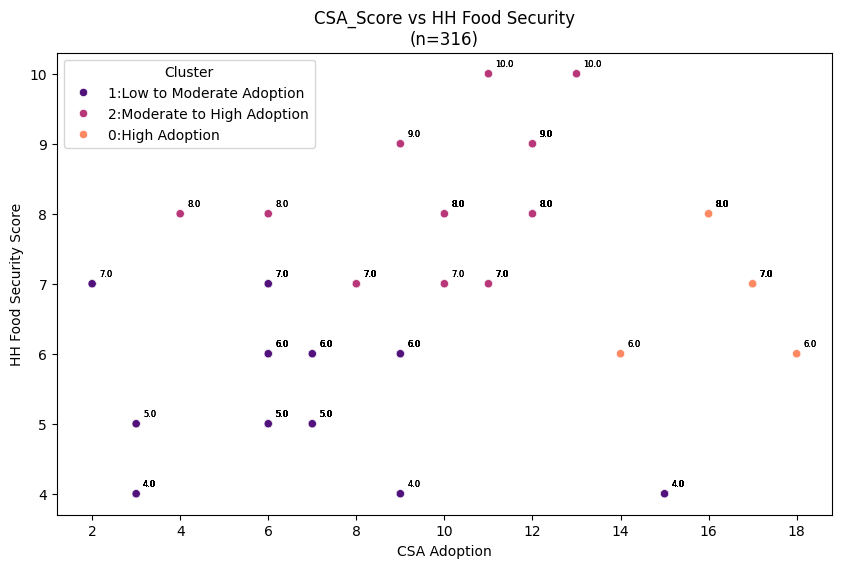

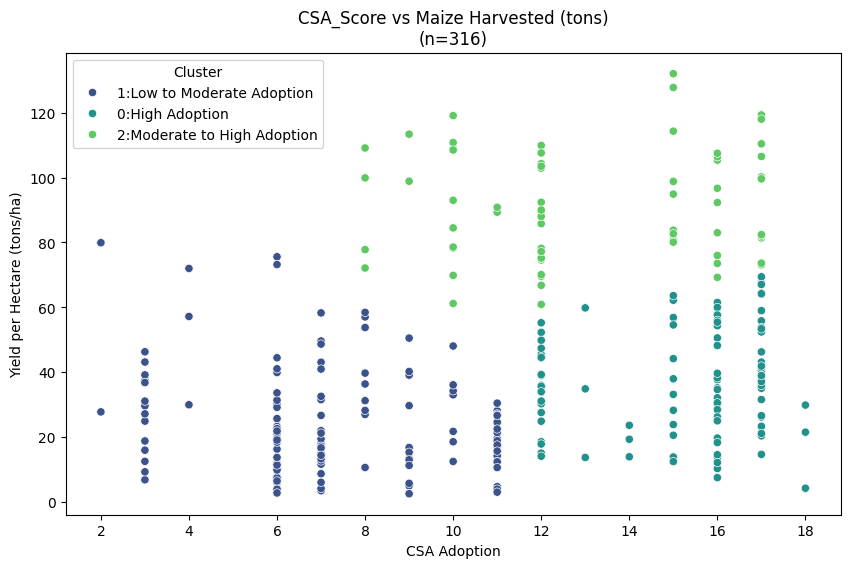

In [ ]:

# Map cluster numbers to meaningful labels
cluster_labels_Yield = {
    0: "0:High Adoption",
    1: "1:Low to Moderate Adoption",
    2: "2:Moderate to High Adoption"
}

cluster_labels_FS = {
    0: "0:High Adoption",
    1: "1:Low to Moderate Adoption",
    2: "2:Moderate to High Adoption"
}
df['Cluster_MP_Label'] = df['Cluster_MP'].map(cluster_labels_Yield)
df['Cluster_HHFS_Label'] = df['Cluster_HHFS'].map(cluster_labels_FS)  # Apply to HHFS cluster if needed

# Update the scatter plot with labels(CSA vs HouseHold Food Security)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='CSA_Score', y='HH_FoodSecurity_Score', hue='Cluster_HHFS_Label', palette='magma')

# Add data labels for all points
for i, row in df.iterrows():
    plt.annotate(f'{row["HH_FoodSecurity_Score"]:.1f}',
                 (row['CSA_Score'], row['HH_FoodSecurity_Score']),
                 xytext=(5, 5),  # Offset in points [x, y]
                 textcoords='offset points',
                 fontsize=6)  # Smaller font to reduce clutter
plt.title('CSA_Score vs HH Food Security\n(n=316)')
plt.xlabel('CSA Adoption')
plt.ylabel('HH Food Security Score')
plt.legend(title='Cluster')
plt.savefig('csa_vs_HH_Food_Security_labeled.png')
plt.show()
plt.close()


# Update the scatter plot with labels
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='CSA_Score', y='Maize Productivity', hue='Cluster_MP_Label', palette='viridis')
plt.title('CSA_Score vs Maize Harvested (tons)\n(n=316)')
plt.xlabel('CSA Adoption')
plt.ylabel('Yield per Hectare (tons/ha)')
plt.legend(title='Cluster')
plt.savefig('csa_vs_yield_per_hectare_labeled.png')
plt.show()
plt.close()

**CSA Adoption vs. Maize Harvested (per hectre)**


* Cluster 0 (High Adoption, Low to Moderate Yield): This suggests that CSA practices alone may not guarantee high yields in this group—other factors like soil quality, water availability, or improper implementation of CSA practices might be limiting productivity.
* Cluster 1 (Low to Moderate Adoption, Low Yield): Farmers in this cluster might not be leveraging CSA practices enough to improve productivity, possibly due to limited access to resources, knowledge, or technology.
* Cluster 2 (Moderate to High Adoption, Higher Yield):This suggests that CSA practices can improve maize productivity when adopted effectively, though the small cluster size indicates this outcome is less common.


**CSA Adoption vs. Household Food-Nutrition Security**
* Cluster 0 (High Adoption, Moderate to High Food Security):This indicates some positive impact of CSA on food security, but not the highest levels, possibly due to other socio-economic constraints.
* Cluster 1 (Low to Moderate Adoption, Low to Moderate Food Security): Limited adoption of CSA practices may leave these households more vulnerable to food insecurity, especially in a region prone to climate variability.
* Cluster 2 (Moderate to High Adoption, High Food Security):This suggests that effective CSA adoption significantly enhances household food-nutrition

### **Box Plot**
Box plot is used to visualize the distribution of maize productivity (tons/ha) across different intensities of CSA Scores (Low[1-6], Medium[7-12], High[12-18]).
It displays the median, quartiles, and potential outliers, allowing comparison of maize productivity levels and variability across CSA Score Level intensities to assess their impact.

* **CSA Score Level Intensity**:  *sum of all CSA practices for farmers*

* **Maize Productivity**: (*Maize Yield per hectre: Farm Output/Farm Size*)

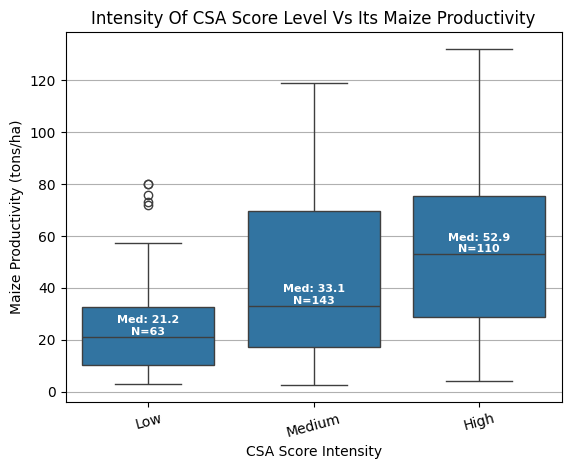

In [ ]:
# Define CSA Adoption categories based on CSA_SCORE
df['CSA_category'] = pd.cut(df['CSA_Score'],
                            bins=[1, 6, 12, 18],  # Bins to categorize CSA scores
                            labels=['Low', 'Medium', 'High'])

# Create a boxplot to visualize CSA categories vs Maize Productivity
ax = sns.boxplot(
    x='CSA_category',
    y='Maize Productivity',
    data=df,
    order=['Low', 'Medium', 'High'])  # Specify order for consistent display

# Calculate medians and sample sizes for each category to add as data labels
categories = ['Low', 'Medium', 'High']
for i, category in enumerate(categories):
    # Extract data for the current category
    category_data = df[df['CSA_category'] == category]['Maize Productivity']
    # Calculate median and sample size
    median = np.median(category_data)
    sample_size = len(category_data)
    # Add data label (median and sample size) above each box
    # Add data label (median and sample size) above each box with white color
    plt.text(i, median, f'Med: {median:.1f}\nN={sample_size}',
             ha='center', va='bottom', fontsize=8, color='white', fontweight='bold')

# Customize plot with title, labels, and grid
plt.title("Intensity Of CSA Score Level Vs Its Maize Productivity")  # Set plot title
plt.xlabel("CSA Score Intensity")  # Label for x-axis
plt.ylabel("Maize Productivity (tons/ha)")  # Label for y-axis
plt.xticks(rotation=15)  # Rotate x-axis labels for readability
plt.grid(True, axis='y')  # Add horizontal grid lines
plt.show()  # Display the plot

* CSA adoption and more CSA practices implemented enhances maize productivity, with a clear progression from Low (15–30 tons/ha) to High (35–78 tons/ha) adoption, supporting its role in boosting yields.
* Higher CSA adoption intensity significantly improves maize productivity, with the High category showing the greatest median yield and potential for extraordinary outputs (outliers). The trend from Low to High adoption indicates a clear positive impact, though increased variability suggests implementation or external factors (e.g soil quality, water access, irrigation, CSA adoption training and CSA implementation method) influences outcomes.
* Outliers: The presence of outliers suggests that some farmers achieve high productivity regardless of CSA adoption, likely due to other factors like better resource access or farming expertise.
* Variability: The wide range in Medium category indicates high variability in productivity, suggesting that CSA adoption alone is not a dominant  predictor of productivity.

### **Correlation Heat Map**
The correlation heatmap explores how CSA adoption (CSA_Score) correlates with maize productivity (Maize Productivity, Farm Yield), household food-nutrition security (HH_FoodSecurity_Score, FoodInsecurity_CopingStrategy_Score), and related factors (Farm Size, Years Farming, Average_farmIncome). Inorder to identify which variables are strongly associated with CSA adoption

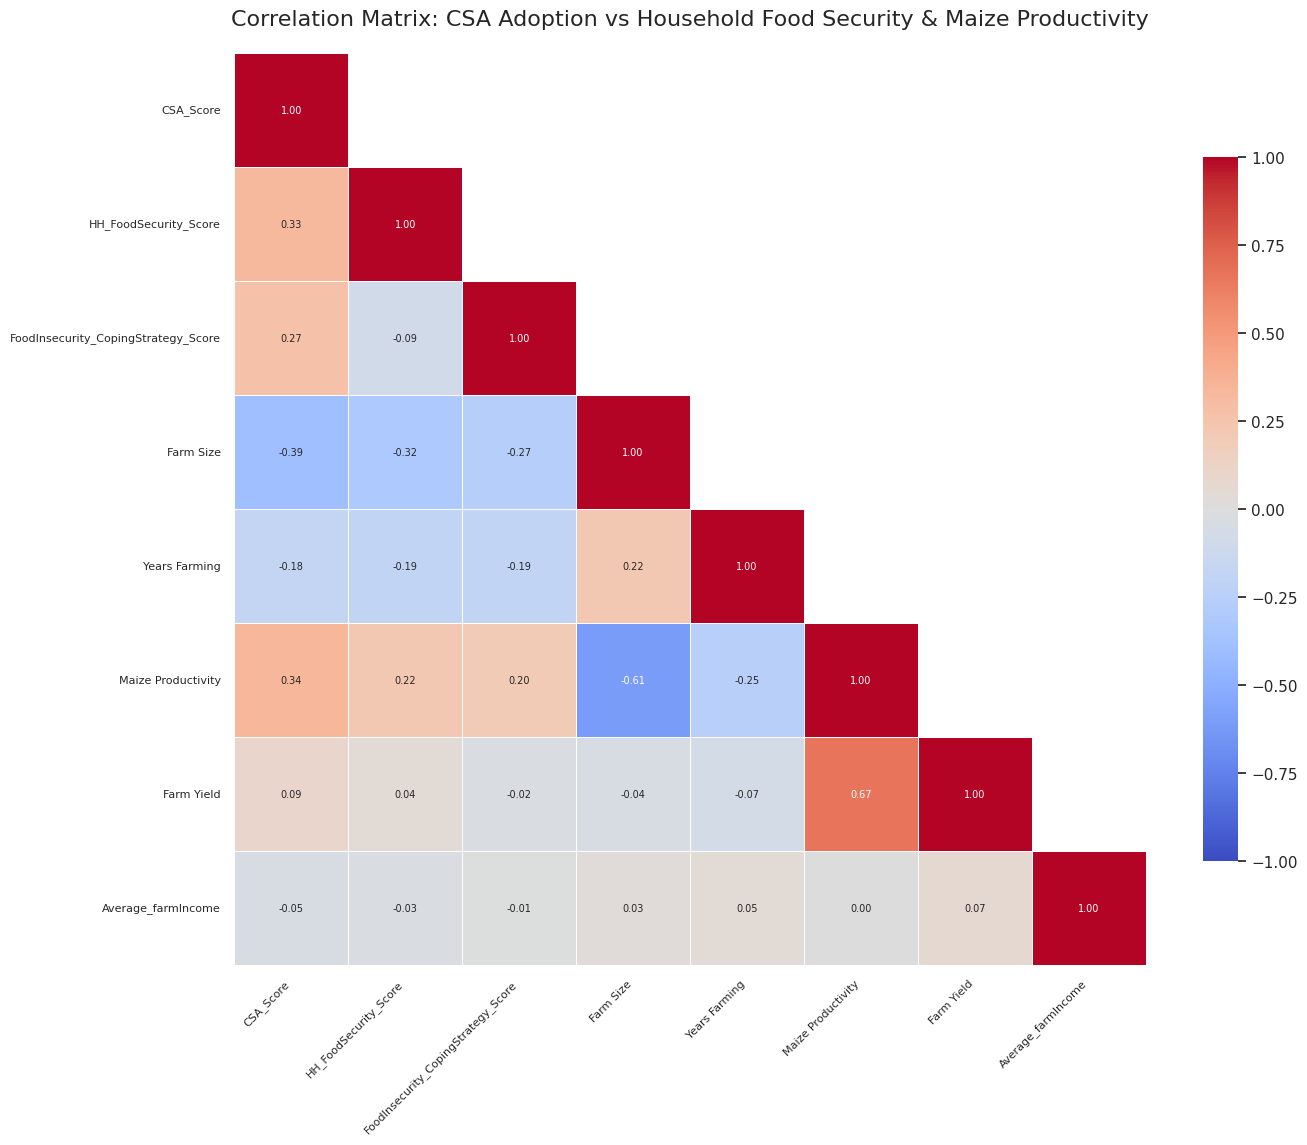

In [ ]:

# Correlation matrix
correlation_matrix = df[['CSA_Score', 'HH_FoodSecurity_Score','FoodInsecurity_CopingStrategy_Score','Farm Size' ,'Years Farming','Maize Productivity','Farm Yield','Average_farmIncome',]].corr()


#Mask for an upper triangle
mask = np.triu(np.ones_like(correlation_matrix , dtype=bool), k=1)

#Making the heatmap
plt.figure(figsize=(14, 12))
sns.set_theme(style="white")

sns.heatmap(
    correlation_matrix ,
    mask=mask,
    cmap="coolwarm",
    annot=True,
    fmt=".2f",
    annot_kws={"size": 7},
    square=True,
    linewidths=0.6,
    cbar_kws={"shrink": 0.7},
    vmax=1,
    vmin=-1,
    xticklabels=True,
    yticklabels=True
)

plt.title('Correlation Matrix: CSA Adoption vs Household Food Security & Maize Productivity', fontsize=16, pad=20)
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.yticks(fontsize=8)
plt.tight_layout()
plt.show()
plt.savefig('correlation_csa_hhfs.png')
plt.close()

* CSA Adoption Score and HH Food Security:  Moderate positive correlation (0.33) suggests that adopting more CSA practices is associated with improved household food security, likely because CSA practices can enhance agricultural resilience and production stability.
* CSA Adoption Score and Maize Productivity: The moderate positive correlation (0.34) indicates that CSA adoption has a positive but not strong impact on maize productivity, aligning with the box plot findings.
* CSA Adoption and Food Insecurity Strategy: The weak positive correlation (0.27) suggests that higher CSA adoption is associated with a slight increase in food insecurity coping strategies. This could indicate that farmers with higher CSA adoption still face challenges (climate shocks, market issues,resources limitations) that necessitate coping mechanisms.Thus CSA reduces severe food insecurity (lowering extreme coping strategies) but doesn’t eliminate the need for coping strategy, especially under tough conditions.
* CSA Adoption Score and Farm Yield: The very weak correlation (0.09) supports the scatter plot’s observation that CSA adoption does not strongly influence maize yield .
* CSA Adoption and Farm_size: The negative correlation (-0.39) suggests that smaller farms are more likely to adopt more CSA practices, possibly due to the feasibility of implementing practices on smaller plots or greater necessity for resilience on smaller farms.
* Maize Productivity and Farm_size: The strong negative correlation (-0.61) indicates that smaller farms tend to have higher maize productivity per hectare, possibly due to more intensive management or better resource use efficiency.


# **Results**

## **General Recommendations**
 * **Promote CSA Adoption:** Target households with Low CSA adoption (linked to low food security and high coping scores) with training and resources to increase CSA uptake, improving food security and reducing vulnerability.
 * **Address Implementation Gaps:** For households with High CSA adoption but only moderate outcomes (e.g., Coping Strategy Score 5), investigate barriers like water access, soil quality, or market constraints to maximize CSA benefits.
 * **Complementary Interventions:**Since the highest food security scores (9–10) are linked to Medium CSA adoption, integrate CSA with other interventions (e.g., income diversification, education) to achieve top-tier food security.
 * **Boost CSA Adoption:** Target Cluster 1 (low to moderate adoption) with training and resources to increase CSA uptake, improving yields and food security.
 * **Optimize High Adoption:** For Cluster 0 (high adoption), address variability in yields and food security by enhancing implementation (e.g., better water management or soil health practices).
 * **Scale Successful Strategies:** Learn from Cluster 2 (moderate to high adoption) to identify and replicate effective CSA practices across the region.
 * **Promote multiple CSA adoption practices** to maximize productivity and food security.
 * **Investigate causes of variability** (e.g., outliers) to ensure consistent benefits for all high-adoption farmers.
 * **Enhance CSA Effectiveness:** Address factors driving coping strategies in high CSA adoption groups (e.g., water scarcity, market access) to ensure productivity gains translate into reduced coping needs.

# **Conclusion**


Includes Data Dictionary of Minimized data set for dashboard and a short summary of executive summary report. Since everything was covered in the notebook

##**Data Dictionary**
A reference that defines all data fields, their formats, and meanings in within our minimized dataset. For better understanding among users of the data set.

In [ ]:


# Define the data dictionary as a list of dictionaries
data_dict = [
    {"Column Name": "Age", "Description": "Age of the farmer", "Data Type": "Integer", "Possible Values": "Positive integers (e.g., 19, 55, 70)"},
    {"Column Name": "Sex", "Description": "Gender of the farmer", "Data Type": "Integer", "Possible Values": "1 (Male), 2 (Female), 4 (Other)"},
    {"Column Name": "Education Status", "Description": "Education level of the farmer", "Data Type": "Integer", "Possible Values": "1 (None), 2 (Primary), 3 (Secondary), 4 (Tertiary)"},
    {"Column Name": "Race", "Description": "Race of the farmer", "Data Type": "Integer", "Possible Values": "1, 2, 3 (Categorical codes, specific meanings unclear)"},
    {"Column Name": "Household Size", "Description": "Number of people in the household", "Data Type": "Integer", "Possible Values": "Positive integers (e.g., 1, 8, 12)"},
    {"Column Name": "Years Farming", "Description": "Number of years the farmer has been farming", "Data Type": "Integer", "Possible Values": "Positive integers (e.g., 5, 15, 31)"},
    {"Column Name": "Farm Size", "Description": "Size of the farm in hectares", "Data Type": "Integer", "Possible Values": "Positive integers (e.g., 10, 30, 70)"},
    {"Column Name": "Credit Access", "Description": "Access to credit for farming", "Data Type": "Integer", "Possible Values": "1 (No), 2 (Yes)"},
    {"Column Name": "A CC training", "Description": "Received climate change adaptation training", "Data Type": "Integer", "Possible Values": "1 (No), 2 (Yes)"},
    {"Column Name": "Irrigation_technology", "Description": "Use of irrigation technology", "Data Type": "Integer", "Possible Values": "0 (No), 1 (Yes)"},
    {"Column Name": "Farm_Output", "Description": "Total farm output (possibly in tons or another unit)", "Data Type": "Integer", "Possible Values": "Positive integers (e.g., 902, 1144)"},
    {"Column Name": "Farm_revenue", "Description": "Revenue generated from farming activities (in local currency)", "Data Type": "Integer", "Possible Values": "Positive integers (e.g., 21930, 23648)"},
    {"Column Name": "Average_farmIncome", "Description": "Average income from farming (in local currency)", "Data Type": "Integer", "Possible Values": "Positive integers (e.g., 3730, 2049)"},
    {"Column Name": "Recepient of Grant", "Description": "Whether the farmer received a social or child support grant", "Data Type": "Integer", "Possible Values": "0 (No), 1 (Yes)"},
    {"Column Name": "Additional Income", "Description": "Income from sources aside from social grants", "Data Type": "Integer", "Possible Values": "0 (No), 1 (Yes)"},
    {"Column Name": "Mulching", "Description": "Use of mulching as a CSA practice", "Data Type": "Integer", "Possible Values": "0 (No), 1 (Yes)"},
    {"Column Name": "Drought Tolerant Crop", "Description": "Use of drought-tolerant crops", "Data Type": "Integer", "Possible Values": "0 (No), 1 (Yes)"},
    {"Column Name": "Inter-Cropping", "Description": "Practice of inter-cropping", "Data Type": "Integer", "Possible Values": "0 (No), 1 (Yes)"},
    {"Column Name": "Cover Cropping", "Description": "Practice of cover cropping", "Data Type": "Integer", "Possible Values": "0 (No), 1 (Yes)"},
    {"Column Name": "Crop Rotation", "Description": "Practice of crop rotation", "Data Type": "Integer", "Possible Values": "0 (No), 1 (Yes)"},
    {"Column Name": "Strip Cropping", "Description": "Practice of strip cropping", "Data Type": "Integer", "Possible Values": "0 (No), 1 (Yes)"},
    {"Column Name": "Crop Intensification", "Description": "Practice of crop intensification", "Data Type": "Integer", "Possible Values": "0 (No), 1 (Yes)"},
    {"Column Name": "Composting", "Description": "Practice of composting", "Data Type": "Integer", "Possible Values": "0 (No), 1 (Yes)"},
    {"Column Name": "Planting Legumes", "Description": "Practice of planting legumes", "Data Type": "Integer", "Possible Values": "0 (No), 1 (Yes)"},
    {"Column Name": "Green Manuring", "Description": "Practice of green manuring", "Data Type": "Integer", "Possible Values": "0 (No), 1 (Yes)"},
    {"Column Name": "Water Harvesting", "Description": "Practice of water harvesting", "Data Type": "Integer", "Possible Values": "0 (No), 1 (Yes)"},
    {"Column Name": "Sprinkler Irrigation", "Description": "Use of sprinkler irrigation", "Data Type": "Integer", "Possible Values": "0 (No), 1 (Yes)"},
    {"Column Name": "Zero-Tillage", "Description": "Practice of zero-tillage", "Data Type": "Integer", "Possible Values": "0 (No), 1 (Yes)"},
    {"Column Name": "Riding Contours", "Description": "Practice of riding contours", "Data Type": "Integer", "Possible Values": "0 (No), 1 (Yes)"},
    {"Column Name": "Earth Bunding", "Description": "Practice of earth bunding", "Data Type": "Integer", "Possible Values": "0 (No), 1 (Yes)"},
    {"Column Name": "Stone Bunding", "Description": "Practice of stone bunding", "Data Type": "Integer", "Possible Values": "0 (No), 1 (Yes)"},
    {"Column Name": "Agroforestry", "Description": "Practice of agroforestry", "Data Type": "Integer", "Possible Values": "0 (No), 1 (Yes)"},
    {"Column Name": "Conservation Agri", "Description": "Practice of conservation agriculture", "Data Type": "Integer", "Possible Values": "0 (No), 1 (Yes)"},
    {"Column Name": "Maize Harvested (tons)", "Description": "Amount of maize harvested in tons", "Data Type": "Integer", "Possible Values": "Positive integers (e.g., 1, 2, 3, 4)"},
    {"Column Name": "Maize (Net Income)", "Description": "Net income from maize production (in local currency)", "Data Type": "Integer", "Possible Values": "Positive integers (e.g., 2000, 3500, 25000)"},
    {"Column Name": "CSA_Score", "Description": "Total score of climate-smart agriculture practices adopted (sum of CSA1-CSA18)", "Data Type": "Integer", "Possible Values": "Integers (e.g., 2, 6, 17)"},
    {"Column Name": "HH_FoodSecurity_Score", "Description": "Household food security score (sum of HHFS1-HHFS12)", "Data Type": "Integer", "Possible Values": "Integers (e.g., 4, 7, 9)"},
    {"Column Name": "FoodInsecurity_CopingStrategy_Score", "Description": "Food insecurity coping strategy score (sum of FICS1-FICS13)", "Data Type": "Integer", "Possible Values": "Integers (e.g., 2, 5, 10)"},
    {"Column Name": "Maize Productivity", "Description": "Maize productivity (Farm Output / Farm Size)", "Data Type": "Float", "Possible Values": "Positive floats (e.g., 30.07, 25.42, 16.83)"},
]

# Create a DataFrame from the data dictionary
data_dict_df = pd.DataFrame(data_dict)

# Save the DataFrame to an Excel file
data_dict_df.to_excel("CSA_Data_Dictionary.xlsx", index=False)

# Print a confirmation message
print("\n Data Dictionary below'")
print(tabulate(data_dict_df, headers='keys', tablefmt='grid', showindex=False))


 Data Dictionary below'
+-------------------------------------+--------------------------------------------------------------------------------+-------------+--------------------------------------------------------+
| Column Name                         | Description                                                                    | Data Type   | Possible Values                                        |
+=====================================+================================================================================+=============+========================================================+
| Age                                 | Age of the farmer                                                              | Integer     | Positive integers (e.g., 19, 55, 70)                   |
+-------------------------------------+--------------------------------------------------------------------------------+-------------+--------------------------------------------------------+
| Sex          

# **Executive Summary Report**

### **Introduction**

The aim is to answer: “To what extent does the adoption of CSA practices improve maize productivity and household food-nutrition security among smallholder farmers in North-West South Africa?”.By assessing the effectiveness of 18 different CSA practices in increasing maize productivity and improving household food nutrition security.

Data was collected from 316 smallholder maize farmers across 20 villages in North-West South Africa, sourced from: https://www.sciencedirect.com/science/article/pii/S2352340924006929. The dataset includes 143 columns, covering demographic details, CSA practices (CSA1-CSA18), household food security indicators (HHFS1-HHFS12), food insecurity coping strategies (FICS1-FICS13), and many other agricultural metrics like farm size and yield which are relevant to answering our question.

Preprocessing was mainly uploading the dataset into Google Colab, generating a summary using skimpy to search for missing values , converting binary columns (e.g., CSA, HHFS, FICS) to 1/0 indicators, transforming specified columns to categorical types, and attempting to remove duplicate rows however none were found.


### **Exploratory Data Analysis**
New features were created:

* Maize Productivity: Farm Output / Farm Size (tons/ha).
* CSA_Score: Sum of 18 CSA practice columns.
* HH_FoodSecurity_Score: Sum of 12 household food security columns.
* FoodInsecurity_CopingStrategy_Score: Sum of 13 coping strategy columns.
* Columns were renamed for clarity (eg, CSA1 to Mulching)  
* Irrelevant columns were dropped(eg, religion) to simplify the data set for further analysis in our dashboard.

### **Statistical Analysis**
* Bar Plot:
Compares the average maize yield (in tons) for different climate-smart agricultural (CSA) practices. Categorized by whether they were adopted (red bars) or not adopted (baby blue bars).
The adoption of CSA practices generally contributes to enhanced household food-nutrition security by increasing the available maize yield which is a staple food.
* Cross-tabulation:
Displays the relationship between CSA adoption and household food security level and the level of Food Insecurity Coping strategies. Affected by CSA adoption score. High CSA adoption improves food security and reduces reliance on coping strategies, though other factors may influence top food security levels beyond CSA alone.
* Scatter plot:
Visually explores the relationship between cluster groups(Low,Medium,High)CSA adoption score/intensity vs household food security and maize productivity whilst incorporating k means standard sclar for unbiased interpretation of results. Implementation of effective CSA adoption techniques leads to higher maize yields and food security, however outcomes still vary by cluster groups possibly due to factors like resource access, implementation quality, and local conditions.
* Box plot:
Visualizes the distribution of maize productivity (tons/ha) across different intensities of CSA Scores (Low[1-6], Medium[7-12], High[12-18]).
It displays the median, quartiles, and potential outliers, allowing comparison of maize productivity levels and variability across CSA Score Level intensities to assess their impact.
The correlation heatmap (shown earlier) highlights relationships between CSA_Score, HH_FoodSecurity_Score, Maize Productivity, and other variables. It shows a moderate positive correlation between CSA adoption and food security (0.33) and maize productivity (0.34), and a strong negative correlation between farm size and maize productivity (-0.61). Higher Median CSA adoption boosts maize productivity, however variability and outliers show outcomes depend on factors like resource access, training, soil quality, and implementation methods.
* Correlation heatmap:
 Identifies which variables related to research questions are correlated with CSA adoption score. CSA adoption moderately improves food security and productivity which ties into the general impression that other factors outside of CSA adoption affect Maize productivity and Household Food security along with CSA practice methods. This is further highlighted by the fact that CSA score weakly influences coping strategies and maize yield meaning other farming methods and practices are required to aid the adoption of CSA practices.

### **Interpretation and Limitations**
* CSA adoption increases average maize yields, enhancing household food-nutrition security.
* High CSA adoption links to better food security and fewer coping strategies, but other factors may also influence high food security levels.
* Outcomes vary across clusters due to factors like resource access,soil quality,water access,training,irrigation system,years of farming experience and implementation strategy of CSA practices.
* The evidence shows that moderate and high adoption yields better food security nutrition and maize productivity however the extent of the impact is only marginal as displayed by the visualisations. This suggests there are other further complex influences that need to be investigated to supplement CSA adoption.
* Geographic Limitations, the local weather conditions and CSA implementation techniques used in the North West are not large enough of a sample size to give conclusive evidence on effecitiveness of CSA practices on maize productivity increasing and assurity of household food nutrition security.


### **Conclusion**

The following report followed a process from data preparation and feature engineering for exploratory visual analysis inorder to interpret the relationships between CSA adoption, maize productivity, and household food-nutrition security. The overall analysis shows that while adopting CSA practices positively impacts both maize productivity and food security, the extent is moderate. Due to other multiple external factors such as resource access,water access,farming experience, soil quality, and CSA practice implementation strategies.

####**Final Recommendation**:
Promote targeted CSA adoption combined with supporting interventions—such as training, infrastructure development, and resource access—to maximize productivity and food security outcomes among smallholder farmers.

To maximize the benefits of CSA adoption, multifaceted strategy is important. Focus should be placed on scaling CSA adoption among low-uptake households and clusters through targeted training, resource provision, and awareness. Simultaneously, optimize outcomes in high-adoption areas by addressing implementation gaps such as water access, soil health, and market connectivity. Integrating complementary factors like workshops from experienced farmers, education on CSA implementation and infrastructure support can be of aid especially where CSA practice is not yielding intended results. Lastly, replicate successful strategies from high-performing clusters while investigating what leads to the  sources of variability in results of CSA practice adopted amongst other farmers.